In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# useful function for creating datasets

from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 300, n_features = 2,
                 centers = 2,
                 cluster_std=1.0,
                 random_state=101)

In [4]:
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [5]:
X,y = data

In [6]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [7]:
# to create a random noise

np.random.seed(seed=101)

z_noise = np.random.normal(size=len(X))

z_noise = pd.Series(z_noise)

In [8]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [9]:
feat = pd.DataFrame(X)

In [11]:
feat = pd.concat([feat, z_noise],axis=1)

In [13]:
feat.columns = ['X1','X2','X3']

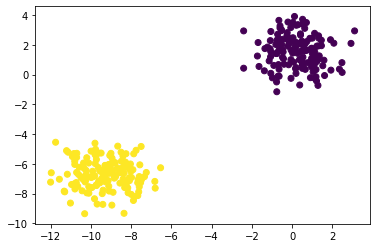

In [15]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


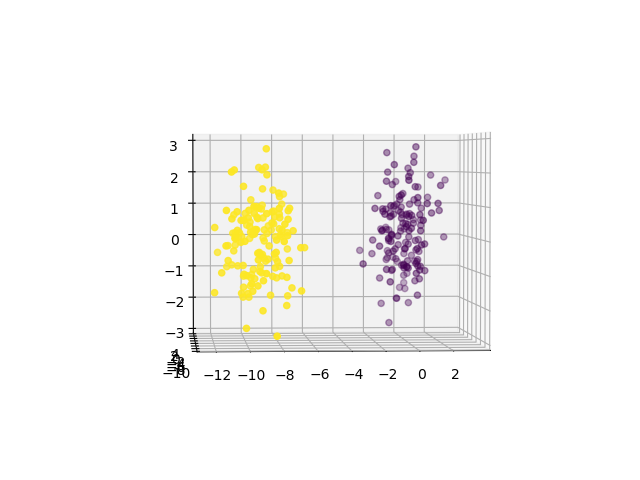

In [21]:
# visualizing in 3d space
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [22]:
# creating encoders and decoders

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



In [ ]:
# architecture for the encoder
# 3-----2------3

In [26]:
# encoder will have 2 output units and input_shape needs to be matched with the proper input shape
encoder =Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [31]:
# decoder will take the input from the output of the encoder and will have output units same as the input shape
# in this case its 3, therefor decoder will have 3 units
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [32]:
# during the training part autoencoder will consist of encoder and decoder, optimizer used here is Stochastic
# gradient descent which can be really useful in autoencoders.
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [33]:
# scaling  the data
from sklearn.preprocessing import MinMaxScaler

In [34]:
# since we dont have the validation and training divisions, scale the entire data

In [35]:
scaler = MinMaxScaler()

In [36]:
scaled_data = scaler.fit_transform(feat)

In [37]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 6s 19ms/sample - loss: 0.3350
Epoch 2/5
300/300 [==============================] - 0s 203us/sample - loss: 0.3350
Epoch 3/5
300/300 [==============================] - 0s 194us/sample - loss: 0.3350
Epoch 4/5
300/300 [==============================] - 0s 180us/sample - loss: 0.3350
Epoch 5/5
300/300 [==============================] - 0s 203us/sample - loss: 0.3350


In [38]:
encoded_2dim = encoder.predict(scaled_data)

In [40]:
encoded_2dim.shape

(300, 2)

In [41]:
scaled_data.shape

(300, 3)

<IPython.core.display.Javascript object>


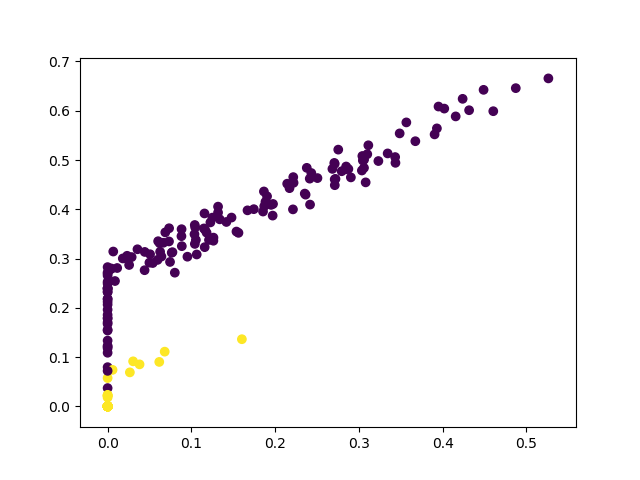

In [44]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)